In [2]:
import cv2
import pytesseract
from pytesseract import image_to_string
from PIL import Image
import matplotlib.pyplot as plt
# set tesseract cmd path to tesseract ocr execute file path
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

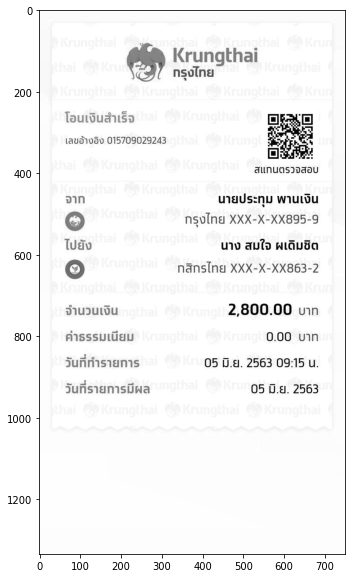

In [37]:
image = cv2.imread("images\\40.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10,10))
plt.imshow(image,cmap='gray')

In [38]:
recog_str = image_to_string(image, lang='tha+eng', config='--psm 6')

In [39]:
print(recog_str)

Krungthai
ทรุงไทย
โอนเงินสําเรือ                 [ตไร [ต]
ร
เลขอ้างอิง 015709029243                          อจ
[ตลนชียง
สแกนตรวจสอบ
อจาก                           นายประทุม พานเงิน
๑๐๑                   กรุงไทย XXX—X—xx895—9
ไปยัง                         นาง สมใจ ผเดิมชิต
                  กสิกรไทย 200(-%->863-2
จํานวนเงิน              2,800.00 uin
ค่าธรรมเนียม                         0.00 บาท
วันที่ทํารายการ             05 มิ.ย. 2563 09:15 น.
วันที่รายการมีผล                   05 มิ.ย. 2563



In [40]:
recog_str = image_to_string(image, lang='tha+eng', config='--psm 3')

In [41]:
print(recog_str)

ค 1(หนทยูเทลเ
ทรุงไทย

โอนเงินสําเรือ

เลขอฮ้างอิง 015709029243

 

สแกนตรวจสอบ

จาก                         นายประทุม พานเงิน
๑๐๑                   กรุงไทย XXX—X—xx895—9
ไปยัง                        นาง สมใจ ผเดิมชิต
                  กสิกรไทย 200(-%-20863-2
จํานวนเงิน              2,800.00 uin
ค่าธรรมเนียม                         0.00 บาท
วันที่ทํารายการ             05 มิ.ย. 2563 09:15 น.

วันที่รายการมีผล                   05 มิ.ย. 2563



In [42]:
image = cv2.imread("images\\1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [43]:
recog_str = image_to_string(image, lang='eng', config='--psm 3')
print(recog_str)

246—0—xxx909
0508608632 KBANK



In [55]:
from pytesseract import Output
image = cv2.imread("images\\22 23.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
print(image.shape)
image2 = image.copy()
for i in range(n_boxes-1):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    subimg = image2[y-2:y+h+2, x-2:x+w+2]
    if h<image2.shape[0]/20:
        sub_str = image_to_string(subimg, lang='tha+eng', config='--psm 6')
        print(sub_str)


(1402, 984)
โอนเงินสําเร็จ

5 มิย 63 19:18 น.                    แจฯ

5

มุย.

63

19:18

U.

สน

น.ุส.นิตสาครว

น.ส.

นิตสาคร

ว

ธุ.กสิกรไทย

ธุ.กสิกรไทย

xxx—x—x0984—x

xxx—x—x0984—x

นาง สมใจ ผเคิมชิต

นาง

สมใจ

ผเดิมชิต

ธุ.กสิกรไทย

ธุ.กสิกรไทย

xxx—x—x0863—x

xxx—x—x0863—x

xxx—x—x0863—x

xxx—x—x0863—x

เลขที่รายการ:

เลขที่รายการ:

010157191853973140

010157191853973140

จํานวน:

จํานวน:

7,200.00 บาท

7,200.00

บาท

ค่าธรรมเนียม:

ค่าธรรมเนียม:

0.00 บาท         Verified by K+

0.00 บาท         Verified by K+

0.00 บาท         Verified by K+

0.00

บาท

Verified

เวบ

K+



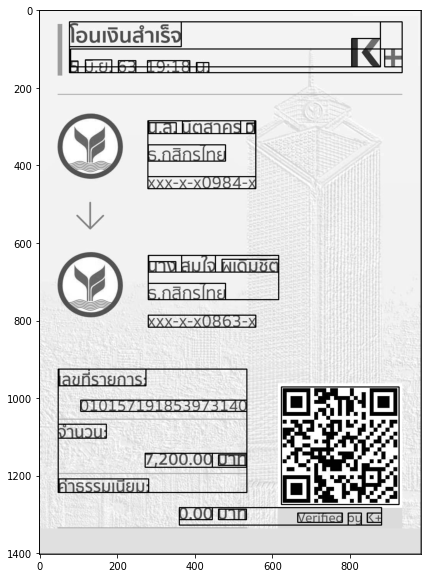

In [56]:

plt.figure(figsize = (10,10))
plt.imshow(image,cmap='gray')

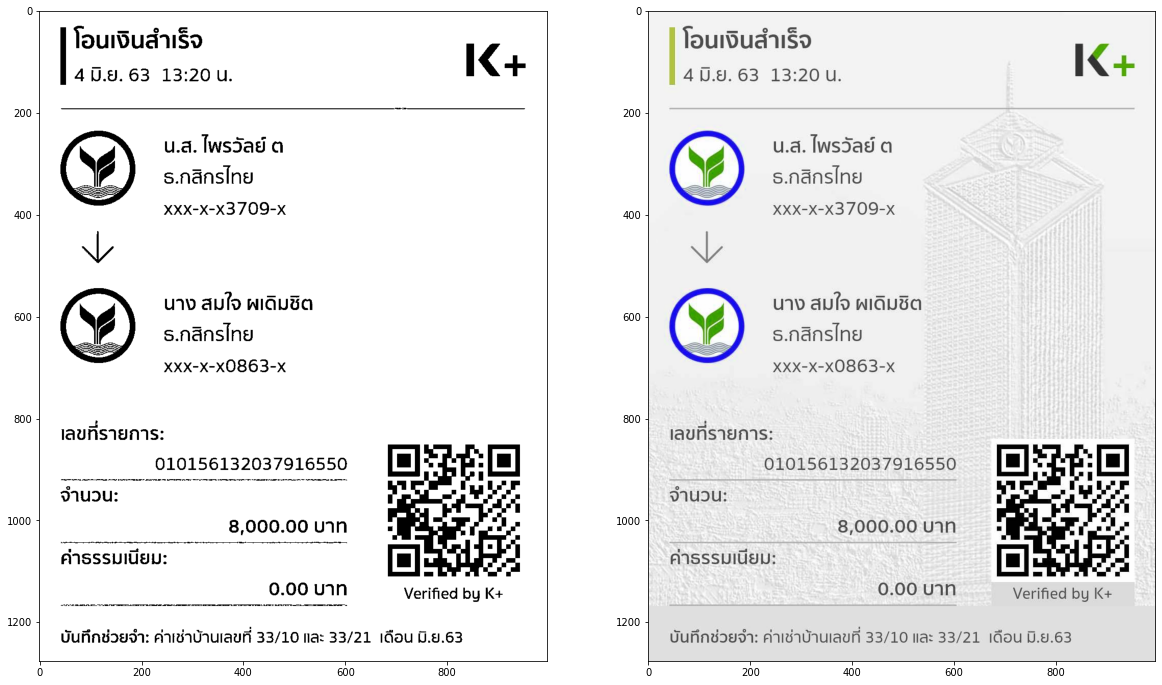

In [129]:
import easyocr
import cv2
image = cv2.imread('images\\10 21.jpg')
image2 = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
a, threshold = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (20,20))
plt.subplot(121)
plt.imshow(threshold,cmap='gray')
plt.subplot(122)
plt.imshow(image2)

In [132]:
reader = easyocr.Reader(['th','en'], gpu=False) # need to run only once to load model into memory
result = reader.readtext(threshold)
print(result)

Using CPU. Note: This module is much faster with a GPU.


[([[61, 25], [331, 25], [331, 85], [61, 85]], 'โอนเงินสำเร็จ', 0.0142329391092062), ([[67, 107], [223, 107], [223, 145], [67, 145]], '4 มิ.ย. 63', 0.12903575599193573), ([[237, 107], [381, 107], [381, 145], [237, 145]], '13:20 น.', 0.5464023947715759), ([[242, 235], [484, 235], [484, 289], [242, 289]], 'น.ส. ไพรวัลย์ ๓', 0.05219877511262894), ([[237, 296], [426, 296], [426, 350], [237, 350]], 'ธ.กสิกรไทย', 0.17309661209583282), ([[241, 369], [489, 369], [489, 407], [241, 407]], 'xxx x-x3709-x', 0.0741160586476326), ([[240, 544], [544, 544], [544, 596], [240, 596]], 'นาง สมใจ ผเดิมชิต', 0.1034662127494812), ([[238, 606], [426, 606], [426, 656], [238, 656]], 'ธ.กสิกรไทย', 0.15126456320285797), ([[241, 676], [491, 676], [491, 716], [241, 716]], 'xxx-x-x0863-x', 0.334881067276001), ([[33, 798], [252, 798], [252, 853], [33, 853]], 'เลขที่รายการ:', 0.1331218034029007), ([[223, 871], [609, 871], [609, 909], [223, 909]], '010156132037916550', 0.5250296592712402), ([[32, 924], [163, 924], [163,

17
['โอนเงินสำเร็จ']
['4 มิ.ย. 63']
['13:20 น.']
['น.ส. ไพรวัลย์ ต']
['ธ.กสิกรไทย']
['xxx-x-x3709-x']
['นาง สมใจ ผเดิมชิต']
['ธ.กสิกรไทย']
['xxx-x-x0863-x']
['เลขที่รายการ:']
['010156132037916550']
['จำนวน:']
['8,000.00 บาท']
[' ค่าธรรมเนียม:']
['o.00 บาท']
['verifed by k+']
['บันทึกช่วยจำ: ค่าเช่าบ้านเลขที่ 33/10 และ 33/21 เดือน มิ.ย.63']


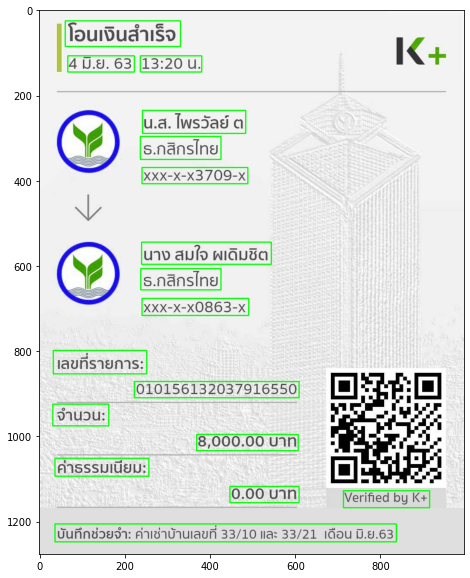

In [134]:
print(len(result))
image3 = image2.copy()
font = cv2.FONT_HERSHEY_SIMPLEX
for entry in result:
    top_left, top_right, bottom_right, bottom_left = entry[0]
    cv2.rectangle(image3, (top_left[0], top_left[1]), (bottom_right[0], bottom_right[1]), (0, 255, 0), 2)
    subimg = image[top_left[1]:bottom_left[1], top_left[0]:top_right[0]]
    ocr_result = reader.readtext(subimg, detail = 0)
    print(ocr_result)
#     sub_str = image_to_string(subimg, lang='tha+eng', config='--psm 6')
#     print(sub_str)
#     cv2.putText(image2, entry[1], (top_left[0], top_left[1]), font, 1, (0, 0, 0), 1, cv2.LINE_AA)
plt.figure(figsize = (10,10))
plt.imshow(image3)

In [104]:
result = reader.readtext(image, detail = 0)
print(result)

[' bualuang /mlbanking', 'ธนาคารกรุงเทบบ', 'รายการโอนเงินสำเร็จ', 'บัญชีผู้โอน 246-0-xxx909', 'บัญชีผู้รับโอน', '0508608632', 'kbank', 'mrs. soma/', 'phadermchit', 'จำนวนเงิน (b)', '5,600.00', 'ค่าธรรมเนียม', 'o.00', 'หมายเลขอ้างอิง', '601970', 'วันที', '05 มิ.ย. 63, 14:29']
